# [COMPTAGE DES POISSONS DE LA PROVINCE DES ILES DEPUIS 2004](https://data.gouv.nc/explore/dataset/comptage-des-poissons-de-la-province-des-iles-depuis-2004/information/)

Disponible sur [data.gouv.nc](https://data.gouv.nc/)

Les catégories de poissons sont décrites comme ceci : 

| Code | Description | Nom latin | Commentaires |
| ---- | ----------- | ---------- | ----------- | 
| PAP | Poissons-papillons et cochers | Chaetodontidae | | 
| CAS | Castex | Diagramma pictum, Plectorhinchus albovittatus, P. chaetodonoides, P. flavomaculatus, P. picus, P. gibbosus | | 
| AGL | Autres grosses lèvres | Plectorhinchus lineatus, P. lessonii | | 
| SAU | Saumonée | Plectropomus leopardus | | 
| TRU | Loche truite | Cromileptes altivelis| | 
| BLE | Loche bleue | Epinephelus cyanopodus | | 
| ALO | Autres loches | Serranidae | | 
| BOS | Perroquet à bosse | Bolbometopon muricatum | | 
| PBL | Perroquet bleu | Chlorurus microrhinos | | 
| APE | Autres poissons-perroquets | Scaridae | | 
| NAP | Napoléon | Cheilinus undulatus | | 
| BEB | Bossus et becs de cane | Gymnocranius sp., Lethrinus atkinsoni, L. genivittatus, L. harak, L. lentjan, L. mahsena, L. miniatus, L. nebulosus, L. obsoletus, L. olivaceus, L. variegatus, L. xanthochilus | | 
| DAW | Dawa | Naso unicornis | | 
| ACA | Poissons-chirurgiens | Acanthuridae, incluant les picots canaques | | 
| SIG | Poissons-lapins | Siganidae : tous les picots sauf le picot canaque | | 
| API | Autres picots | Siganidae+Acanthuridae| Code utilisé pour les suivis dont le démarrage était antérieur à 2012, à partir de 2012, ce code a été scindé en ACA (Acanthuridae) et SIG (Siganidae)| 

In [2]:
!wget "https://data.gouv.nc/explore/dataset/comptage-des-poissons-de-la-province-des-iles-depuis-2004/download/?format=csv&timezone=Pacific/Noumea&lang=fr&use_labels_for_header=true&csv_separator=%2C" -O data/poissons.csv

--2022-05-10 00:27:47--  https://data.gouv.nc/explore/dataset/comptage-des-poissons-de-la-province-des-iles-depuis-2004/download/?format=csv&timezone=Pacific/Noumea&lang=fr&use_labels_for_header=true&csv_separator=%2C
Resolving proxy-web.proxy-dmz.gnc (proxy-web.proxy-dmz.gnc)... 172.20.100.40
Connecting to proxy-web.proxy-dmz.gnc (proxy-web.proxy-dmz.gnc)|172.20.100.40|:3128... connected.
Proxy request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘data/poissons.csv’

data/poissons.csv       [   <=>              ] 231.76K   340KB/s    in 0.7s    

2022-05-10 00:27:48 (340 KB/s) - ‘data/poissons.csv’ saved [237323]



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('data/poissons.csv')
df['Type de poisson (Code)'] = df['Type de poisson (Code)'].astype("category")
df['Station'] = df['Station'].astype("category")
df['Site'] = df['Site'].astype("category")
print(df.head())
print(df.dtypes)

   Campagne      Site    Station  Transect Type de poisson (Code)  Décompte
0      2004  Luengoni  Jo ne weg         1                    API         2
1      2004  Luengoni  Jo ne weg         2                    PAP         0
2      2004  Luengoni  Jo ne weg         2                    ALO         2
3      2004  Luengoni  Jo ne weg         3                    BEB         0
4      2004  Luengoni  Jo ne weg         3                    APE         2
Campagne                     int64
Site                      category
Station                   category
Transect                     int64
Type de poisson (Code)    category
Décompte                     int64
dtype: object


##### 

In [3]:
print(df.describe())
print("Nombre de station : %s" % len(df['Station'].cat.categories.unique()))
print("Nombre de site : %s" % len(df['Site'].cat.categories.unique()))

          Campagne     Transect     Décompte
count  7852.000000  7852.000000  7852.000000
mean   2013.688742     2.500000     1.536042
std       4.816375     1.118105     4.589877
min    2004.000000     1.000000     0.000000
25%    2010.000000     1.750000     0.000000
50%    2014.000000     2.500000     0.000000
75%    2018.000000     3.250000     0.000000
max    2019.000000     4.000000    76.000000
Nombre de station : 32
Nombre de site : 14


## Répartitions des types de poissons en fonction de la profondeur

  Type de poisson (Code)  Décompte  Transect
0                    API         2         1
1                    PAP         0         2
2                    ALO         2         2
3                    BEB         0         3
4                    APE         2         3


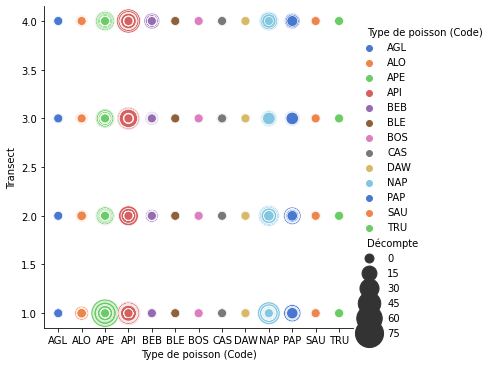

In [4]:
df1 = df[['Type de poisson (Code)', 'Décompte', 'Transect']]
print(df1.head())
sns.relplot(x='Type de poisson (Code)', y='Transect', data=df1, size='Décompte', sizes=(80, 800), palette="muted", hue="Type de poisson (Code)")


## Evolution du nombre total de poissons

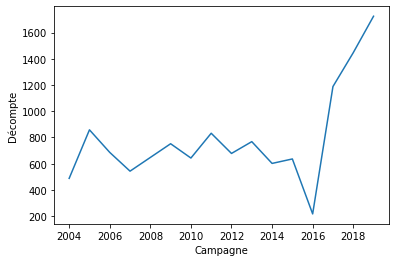

In [5]:
df_global = df[['Décompte', 'Campagne']]
df_global = df_global.groupby('Campagne').sum()
ax = sns.lineplot(x='Campagne', y='Décompte',
                     data=df_global,
                     ci=None)


## Répartition par catégorie de poissons et transect dans le temps

In [6]:
def draw_evolution_by_category(df):
    ncols = 3
    nrows = len(df['Type de poisson (Code)'].cat.categories.unique()) % ncols
    figure = plt.figure(figsize=(50, 50))
    figure.subplots_adjust(hspace=0.4, wspace=0.4)
    share_handle = plt.gca()
    for i, cat in enumerate(df['Type de poisson (Code)'].cat.categories.unique()):
        filtered_df = df[df['Type de poisson (Code)'] == cat]
        axes = figure.add_subplot(5, 3, i+1, sharex=share_handle)
        ax = sns.lineplot(x='Campagne', y='Décompte',
                          data=filtered_df,
                          hue="Transect", ci=None, ax=axes)
        ax.set_title(cat, fontsize=32)


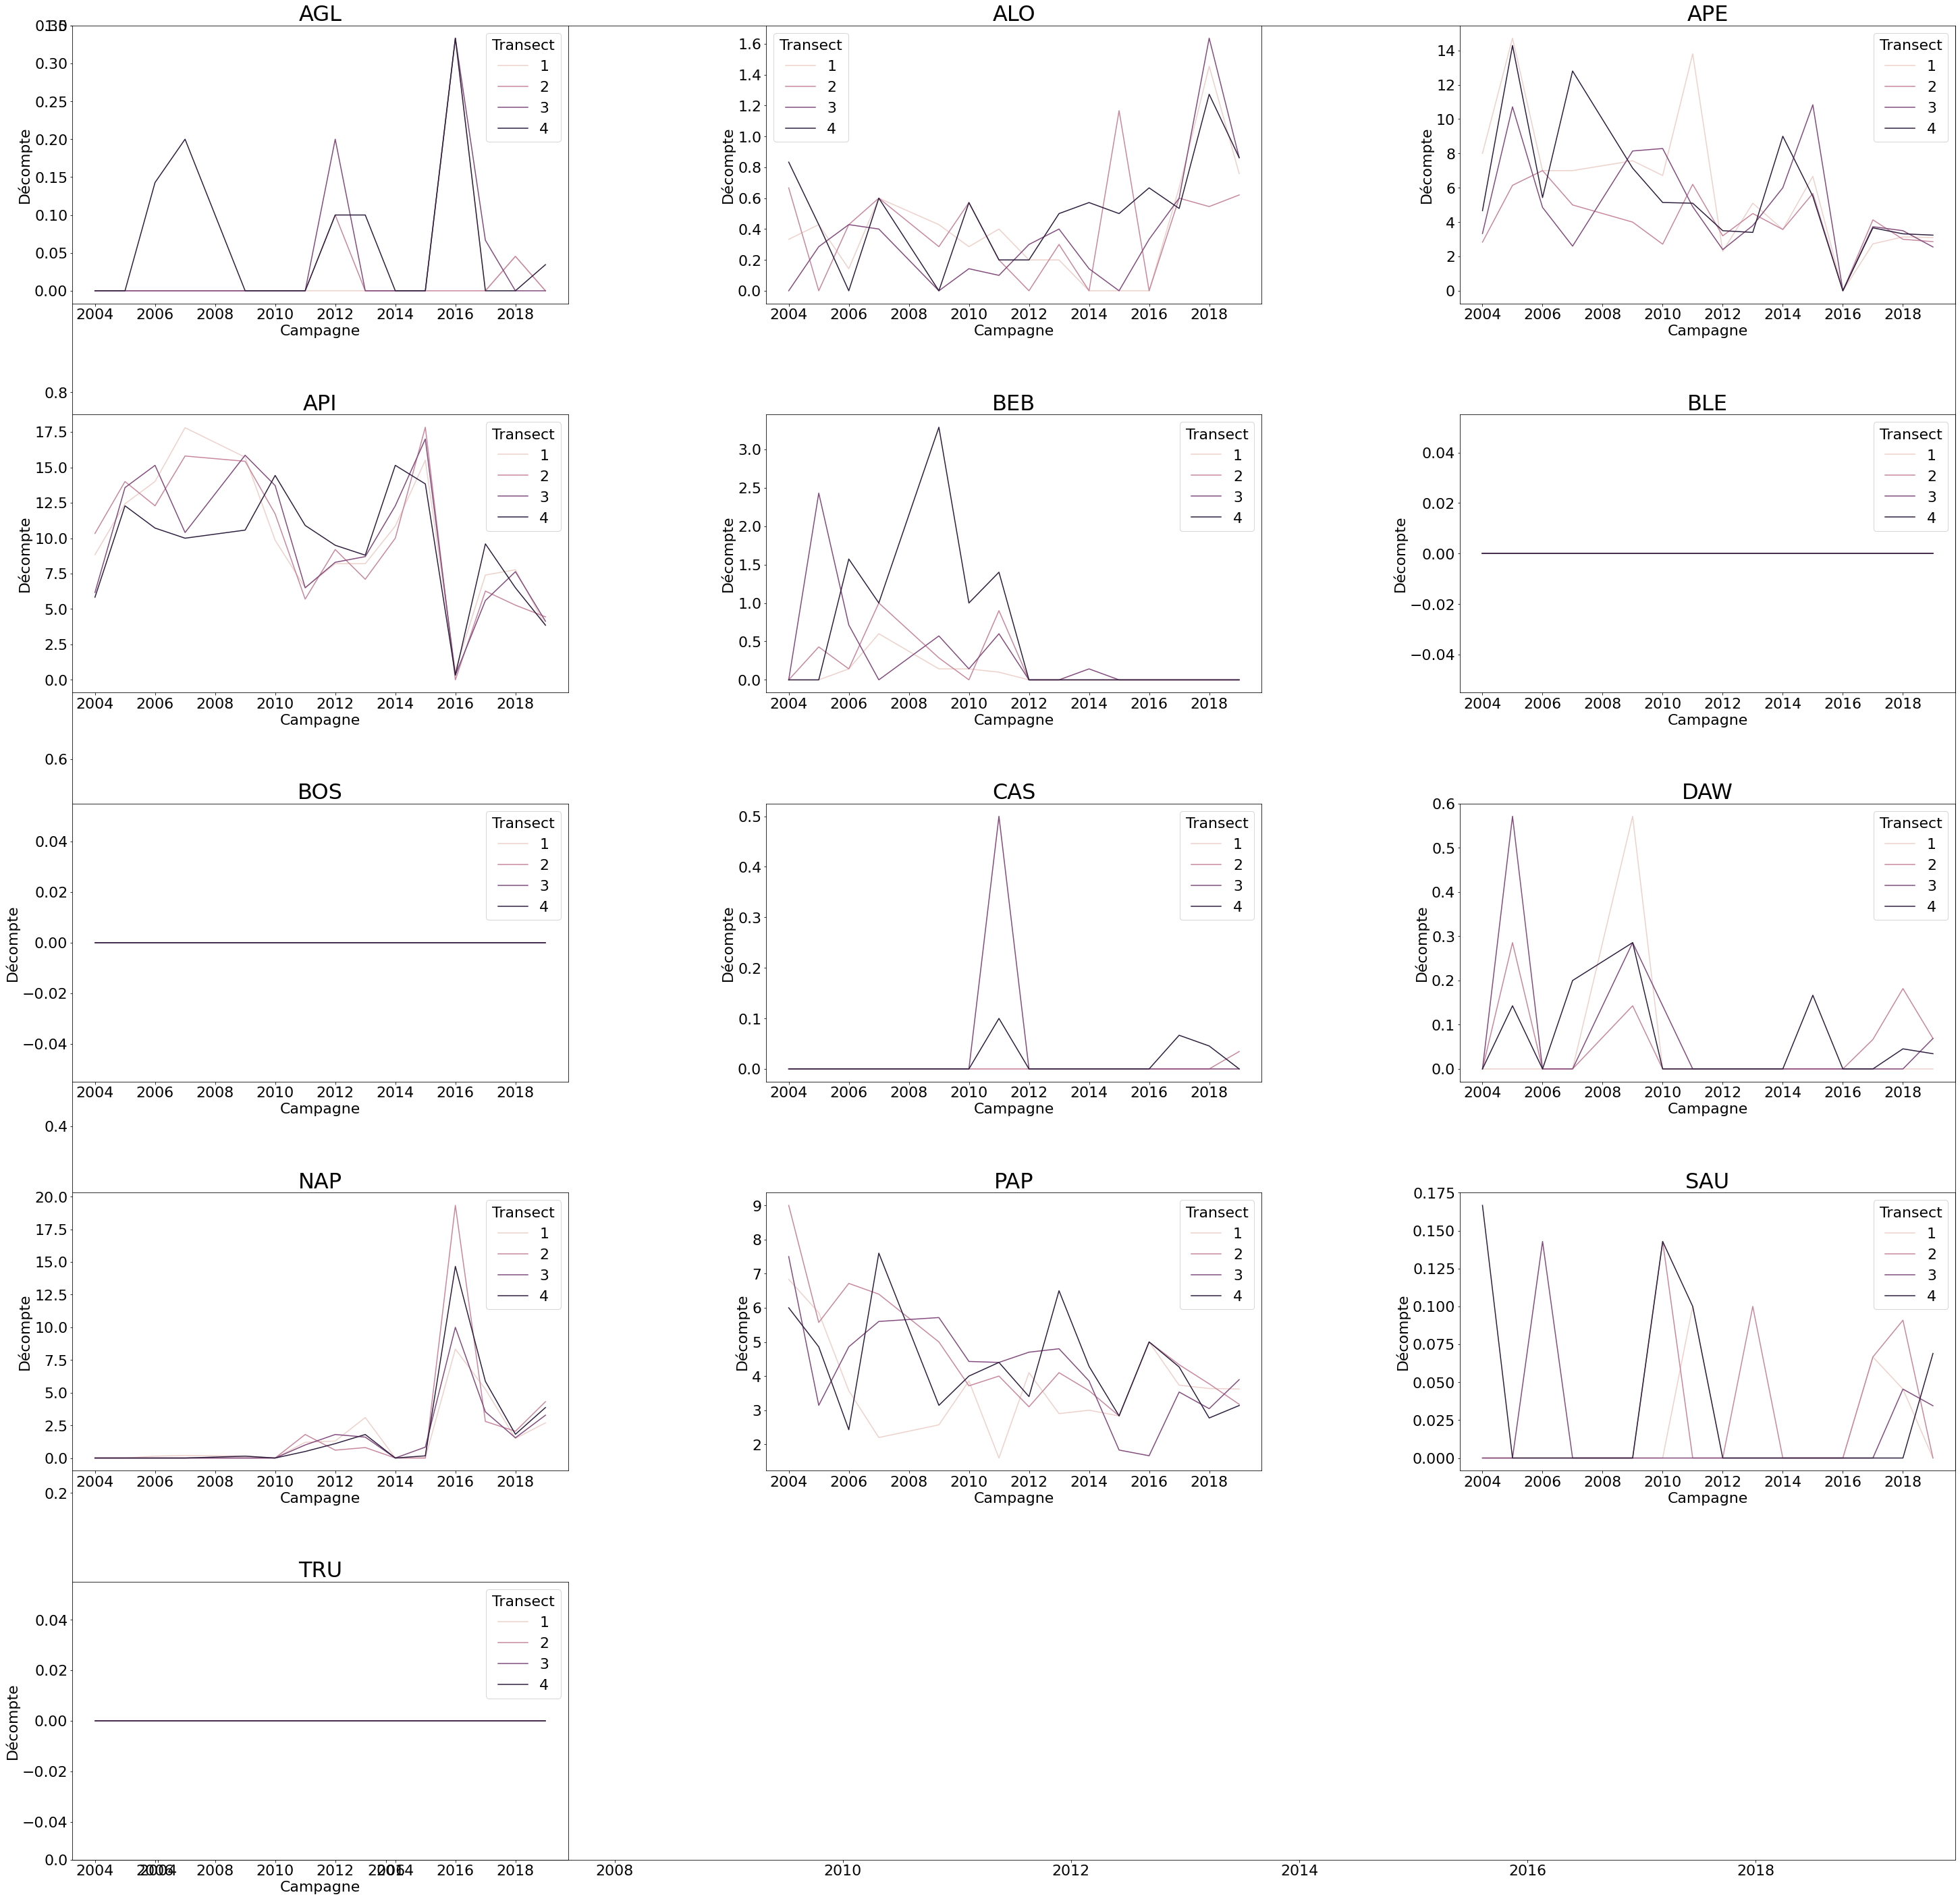

In [7]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
draw_evolution_by_category( df[['Type de poisson (Code)', 'Décompte', 'Transect', 'Campagne']])

## Variation du nombre de poissons dans le temps par catégorie

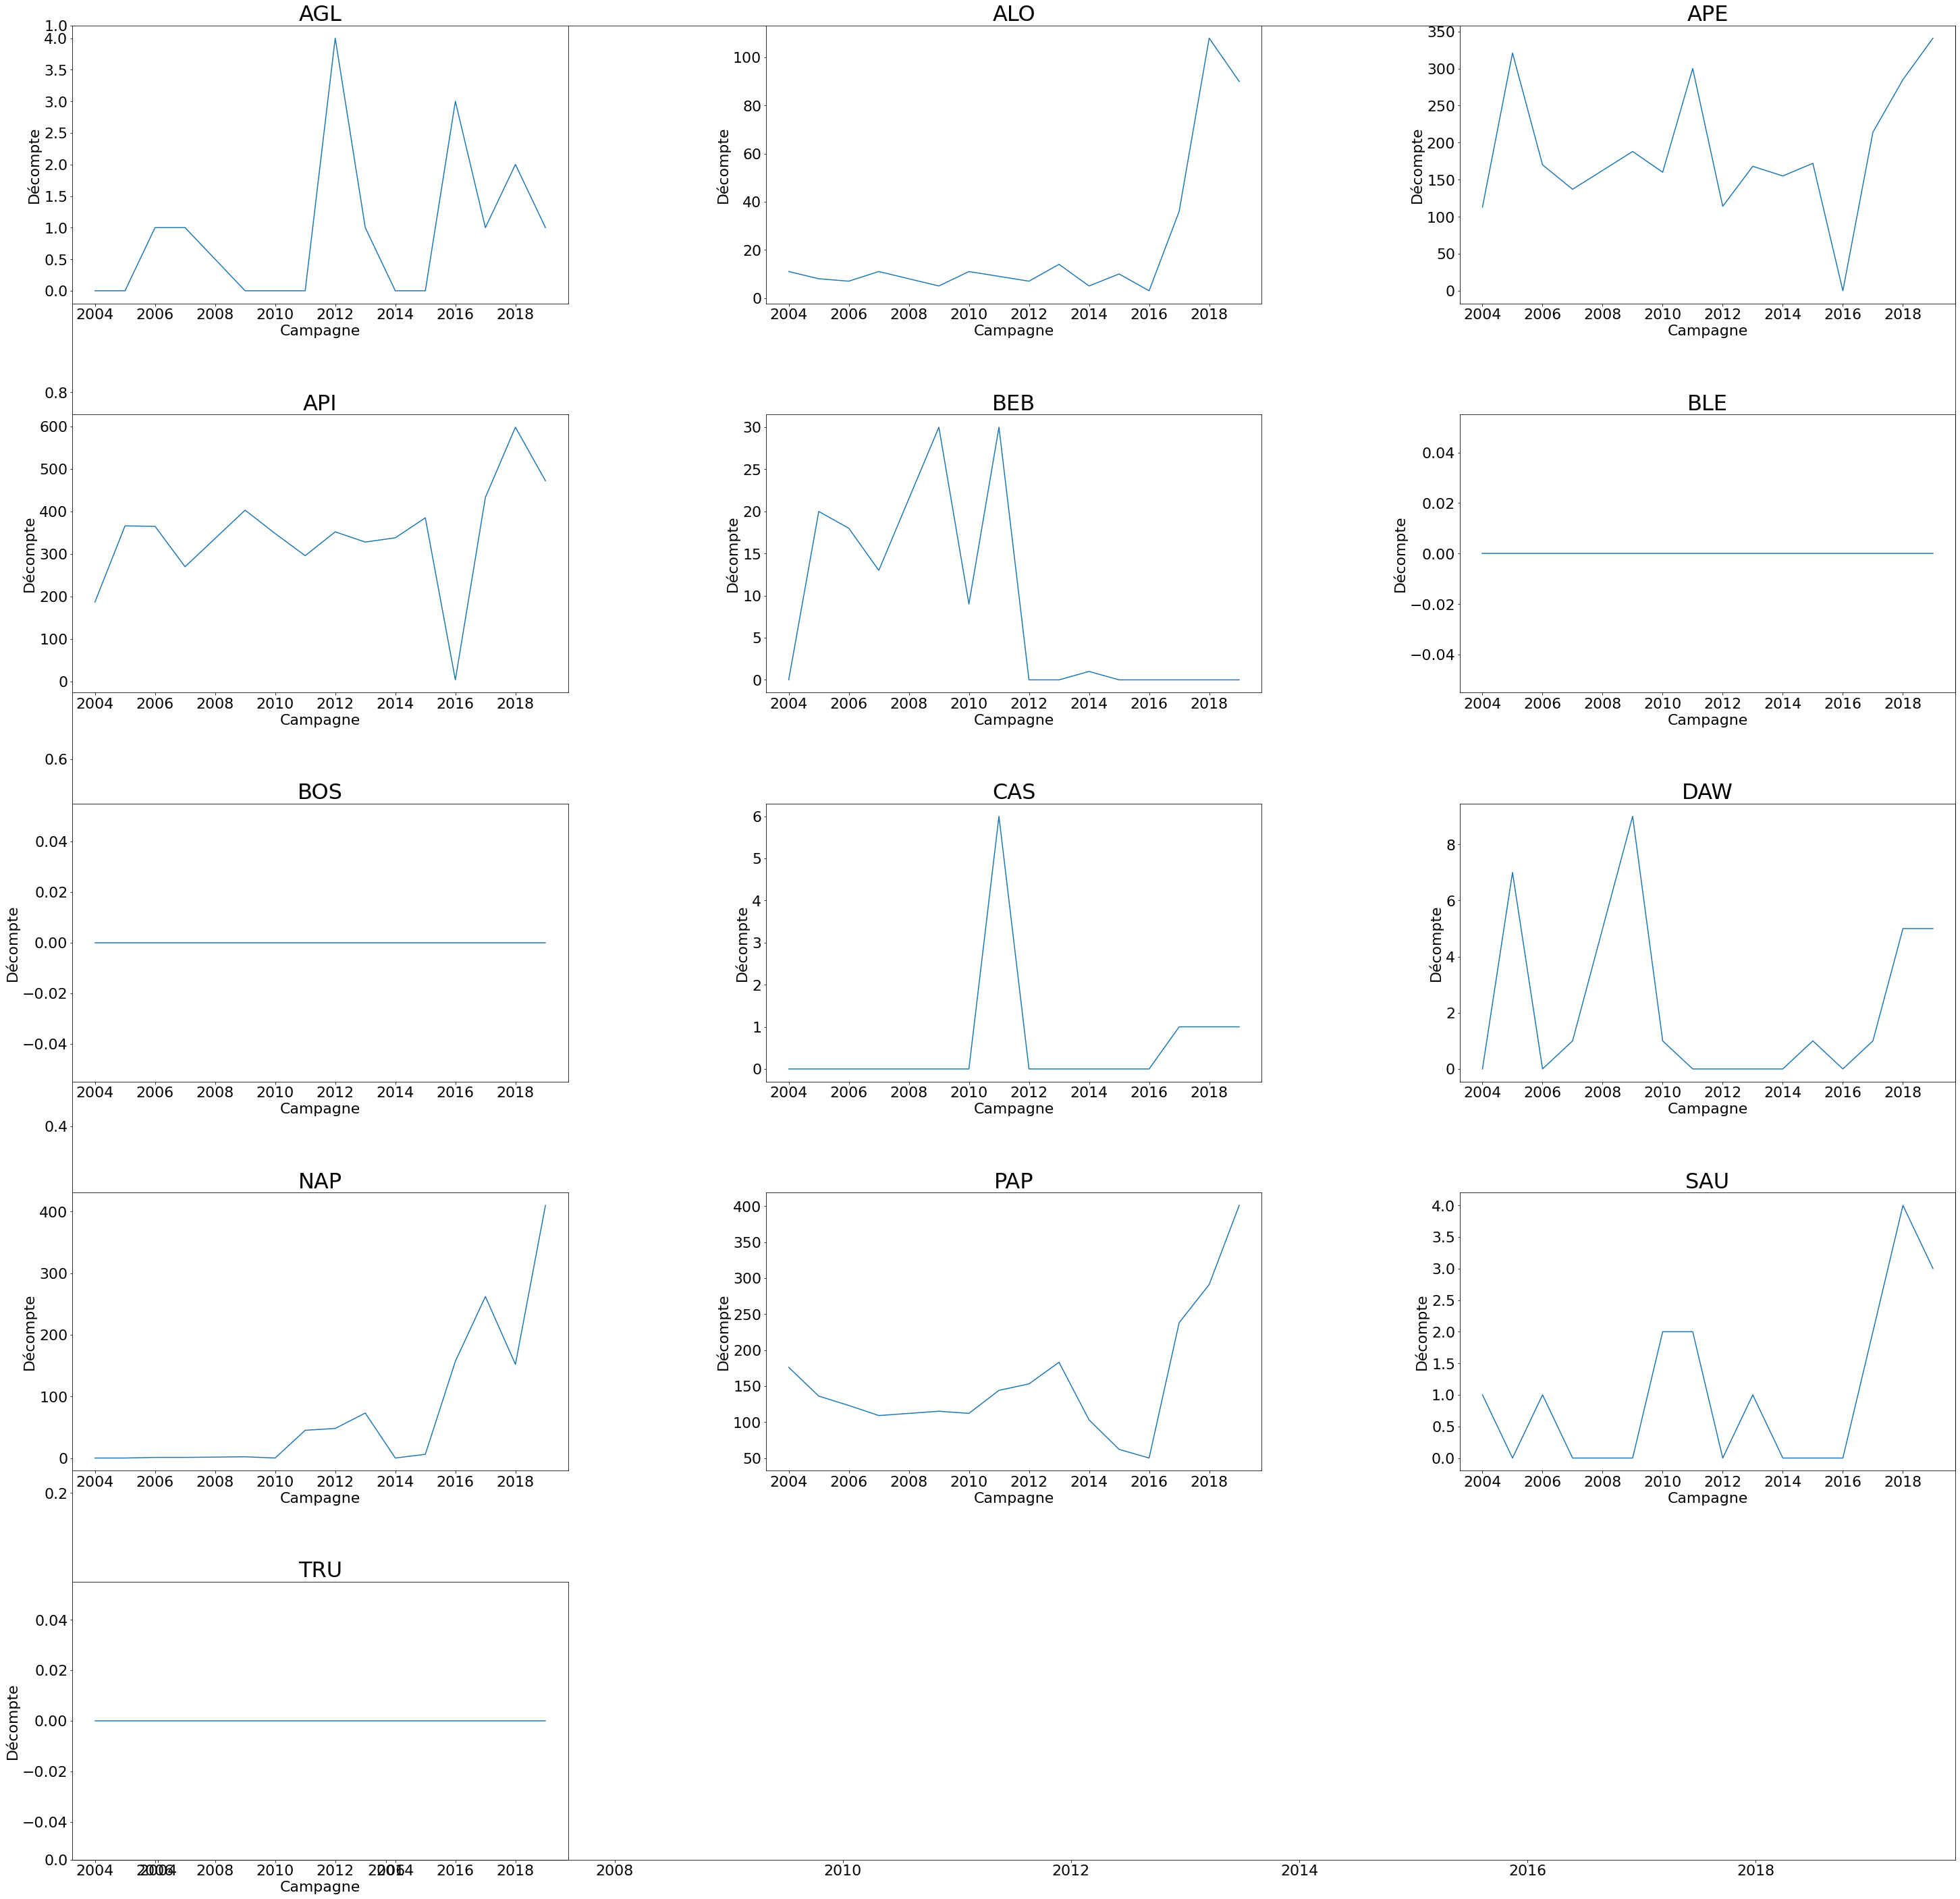

In [8]:
def draw_total_evolution(df):
    figure = plt.figure(figsize=(50, 50))
    figure.subplots_adjust(hspace=0.4, wspace=0.4)
    share_handle = plt.gca()
    for i, cat in enumerate(df['Type de poisson (Code)'].cat.categories.unique()):
        filtered_df = df[df['Type de poisson (Code)'] == cat].groupby('Campagne').sum()
        axes = figure.add_subplot(5, 3, i+1, sharex=share_handle)
        ax = sns.lineplot(x='Campagne', y='Décompte',
                          data=filtered_df,
                          ci=None, ax=axes)
        ax.set_title(cat, fontsize=32)


draw_total_evolution(df[['Type de poisson (Code)', 'Décompte', 'Campagne']])

## Evolution du nombre de poissons par station

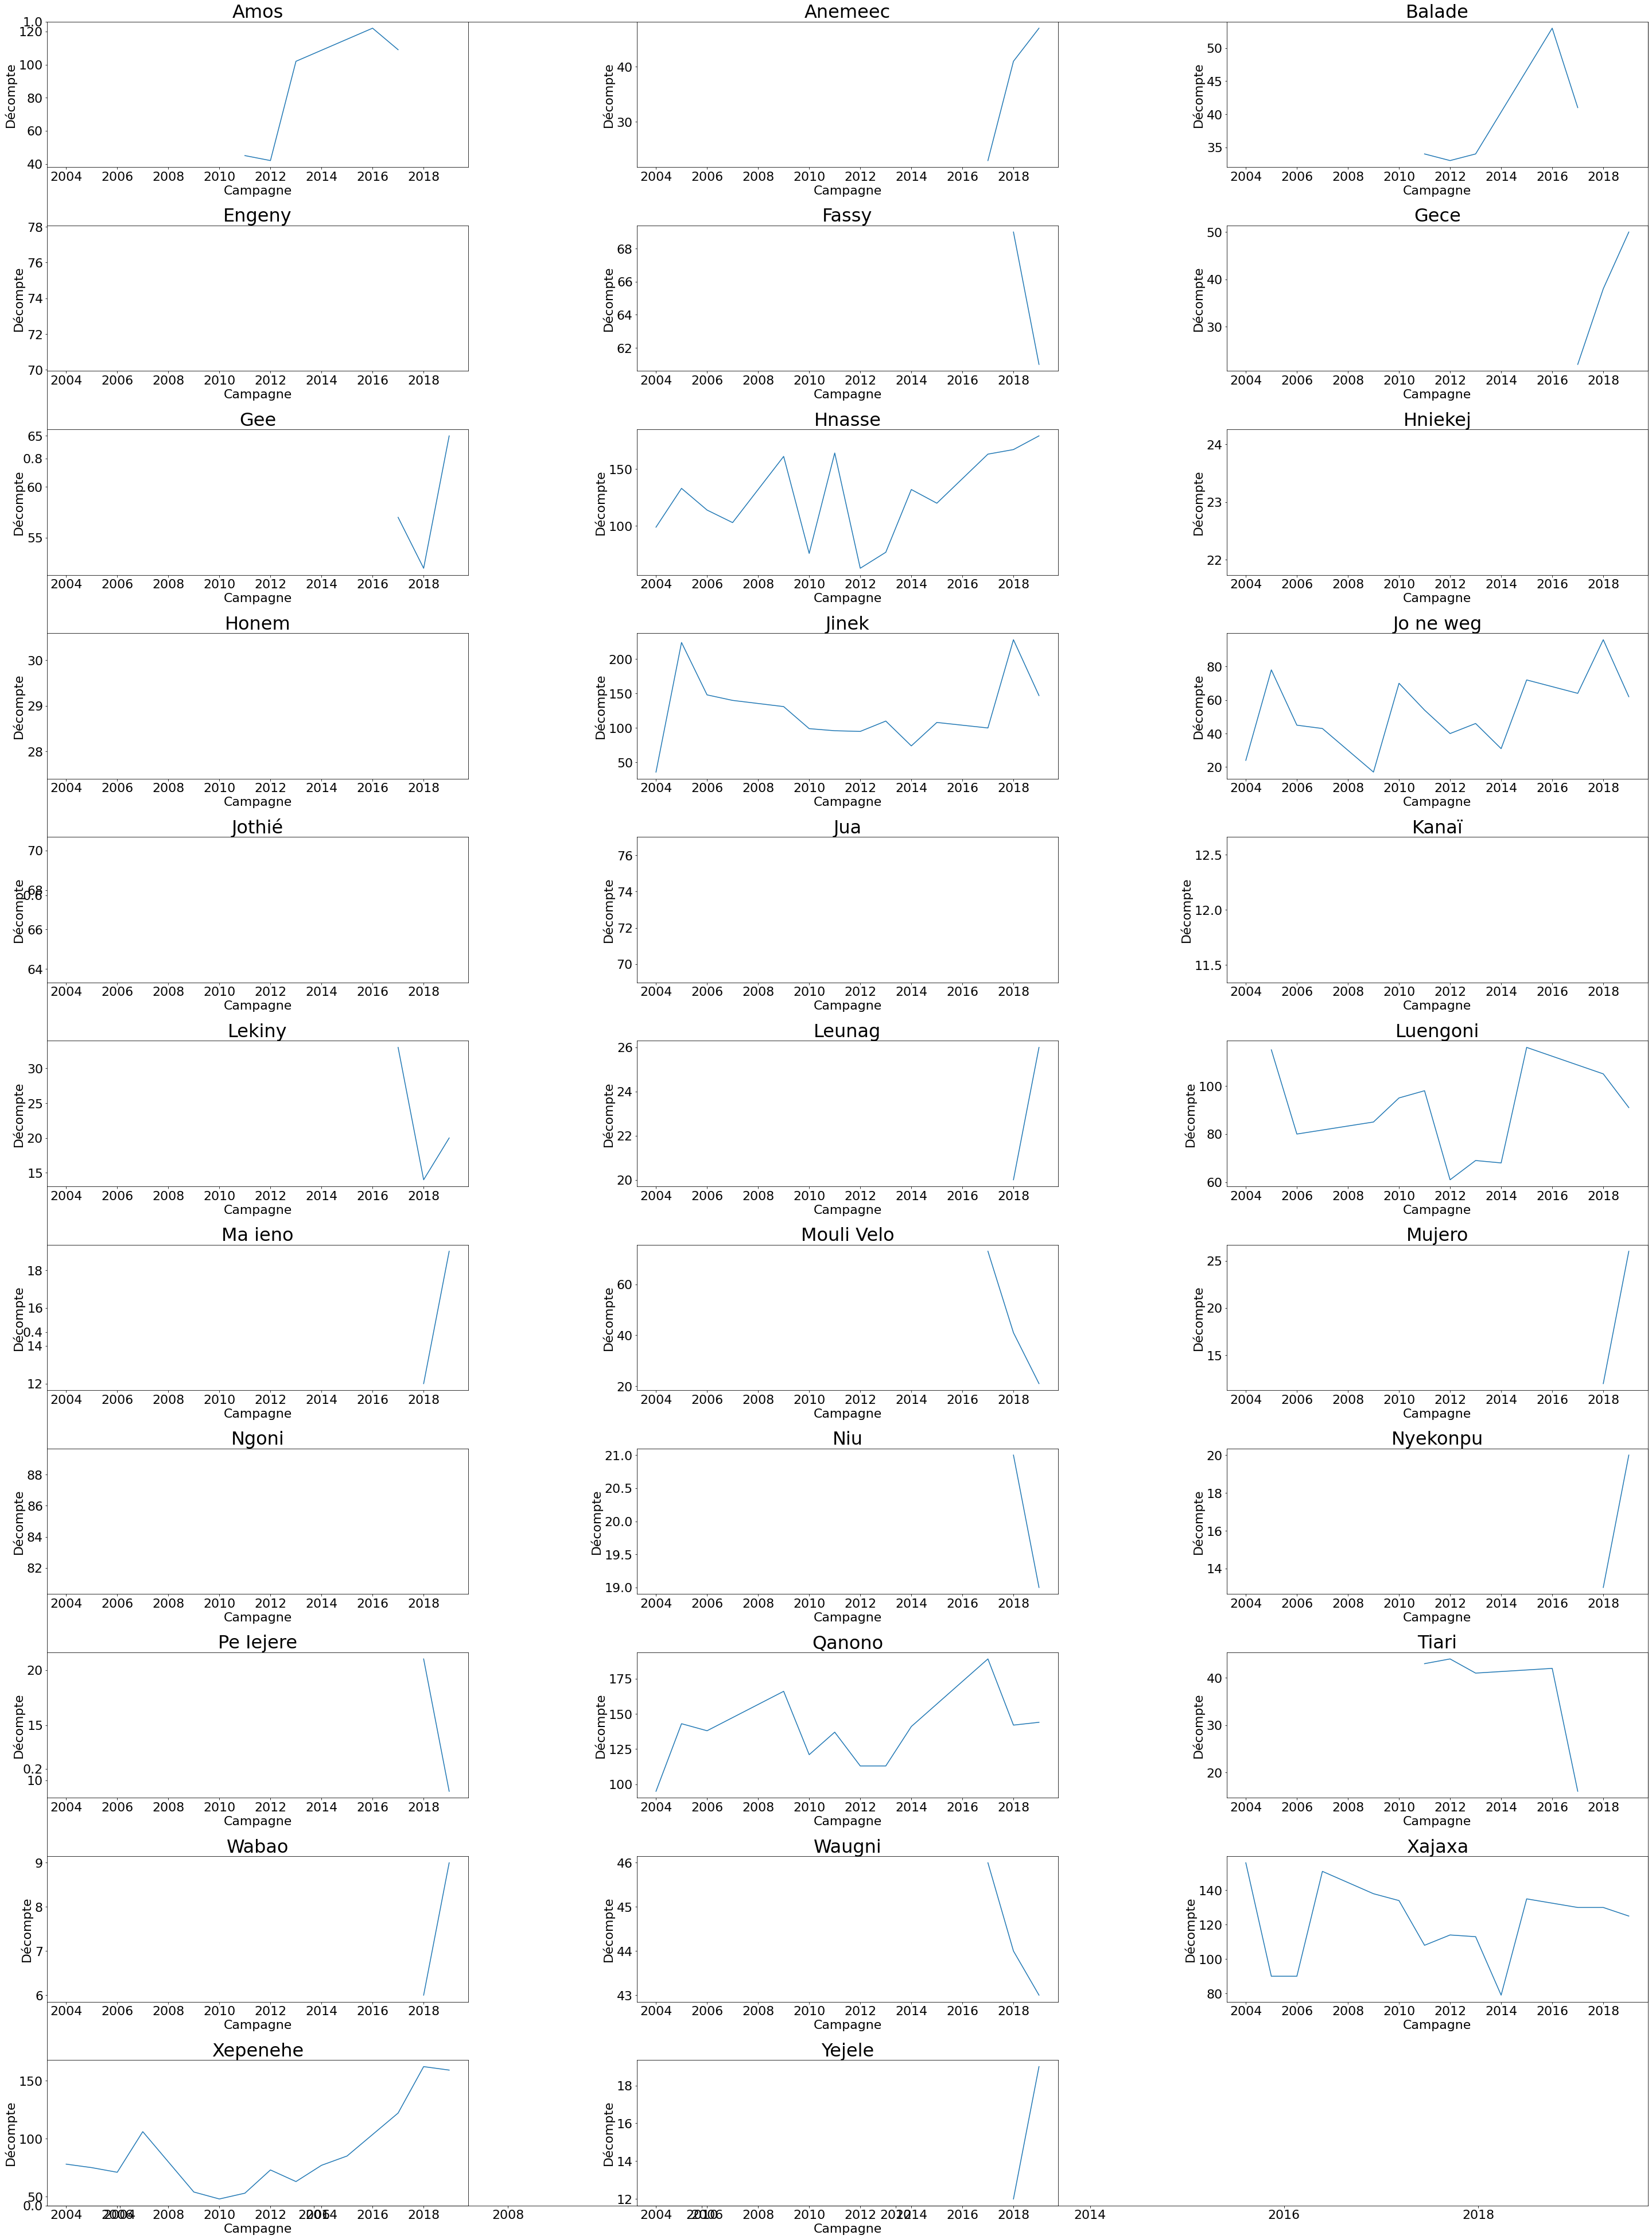

In [9]:
def draw_total_evolution(df):
    figure = plt.figure(figsize=(50, 70))
    figure.subplots_adjust(hspace=0.4, wspace=0.4)
    share_handle = plt.gca()
    for i, cat in enumerate(df['Station'].cat.categories.unique()):
        filtered_df = df[df['Station'] == cat].groupby('Campagne').sum()
        axes = figure.add_subplot(int(len(df['Station'].cat.categories.unique())/3)+1 ,3, i+1, sharex=share_handle)
        ax = sns.lineplot(x='Campagne', y='Décompte',
                          data=filtered_df,
                          ci=None, ax=axes)
        ax.set_title(cat, fontsize=32)

draw_total_evolution( df[['Station', 'Décompte', 'Campagne']])

## Evolution du nombre de poissons par site

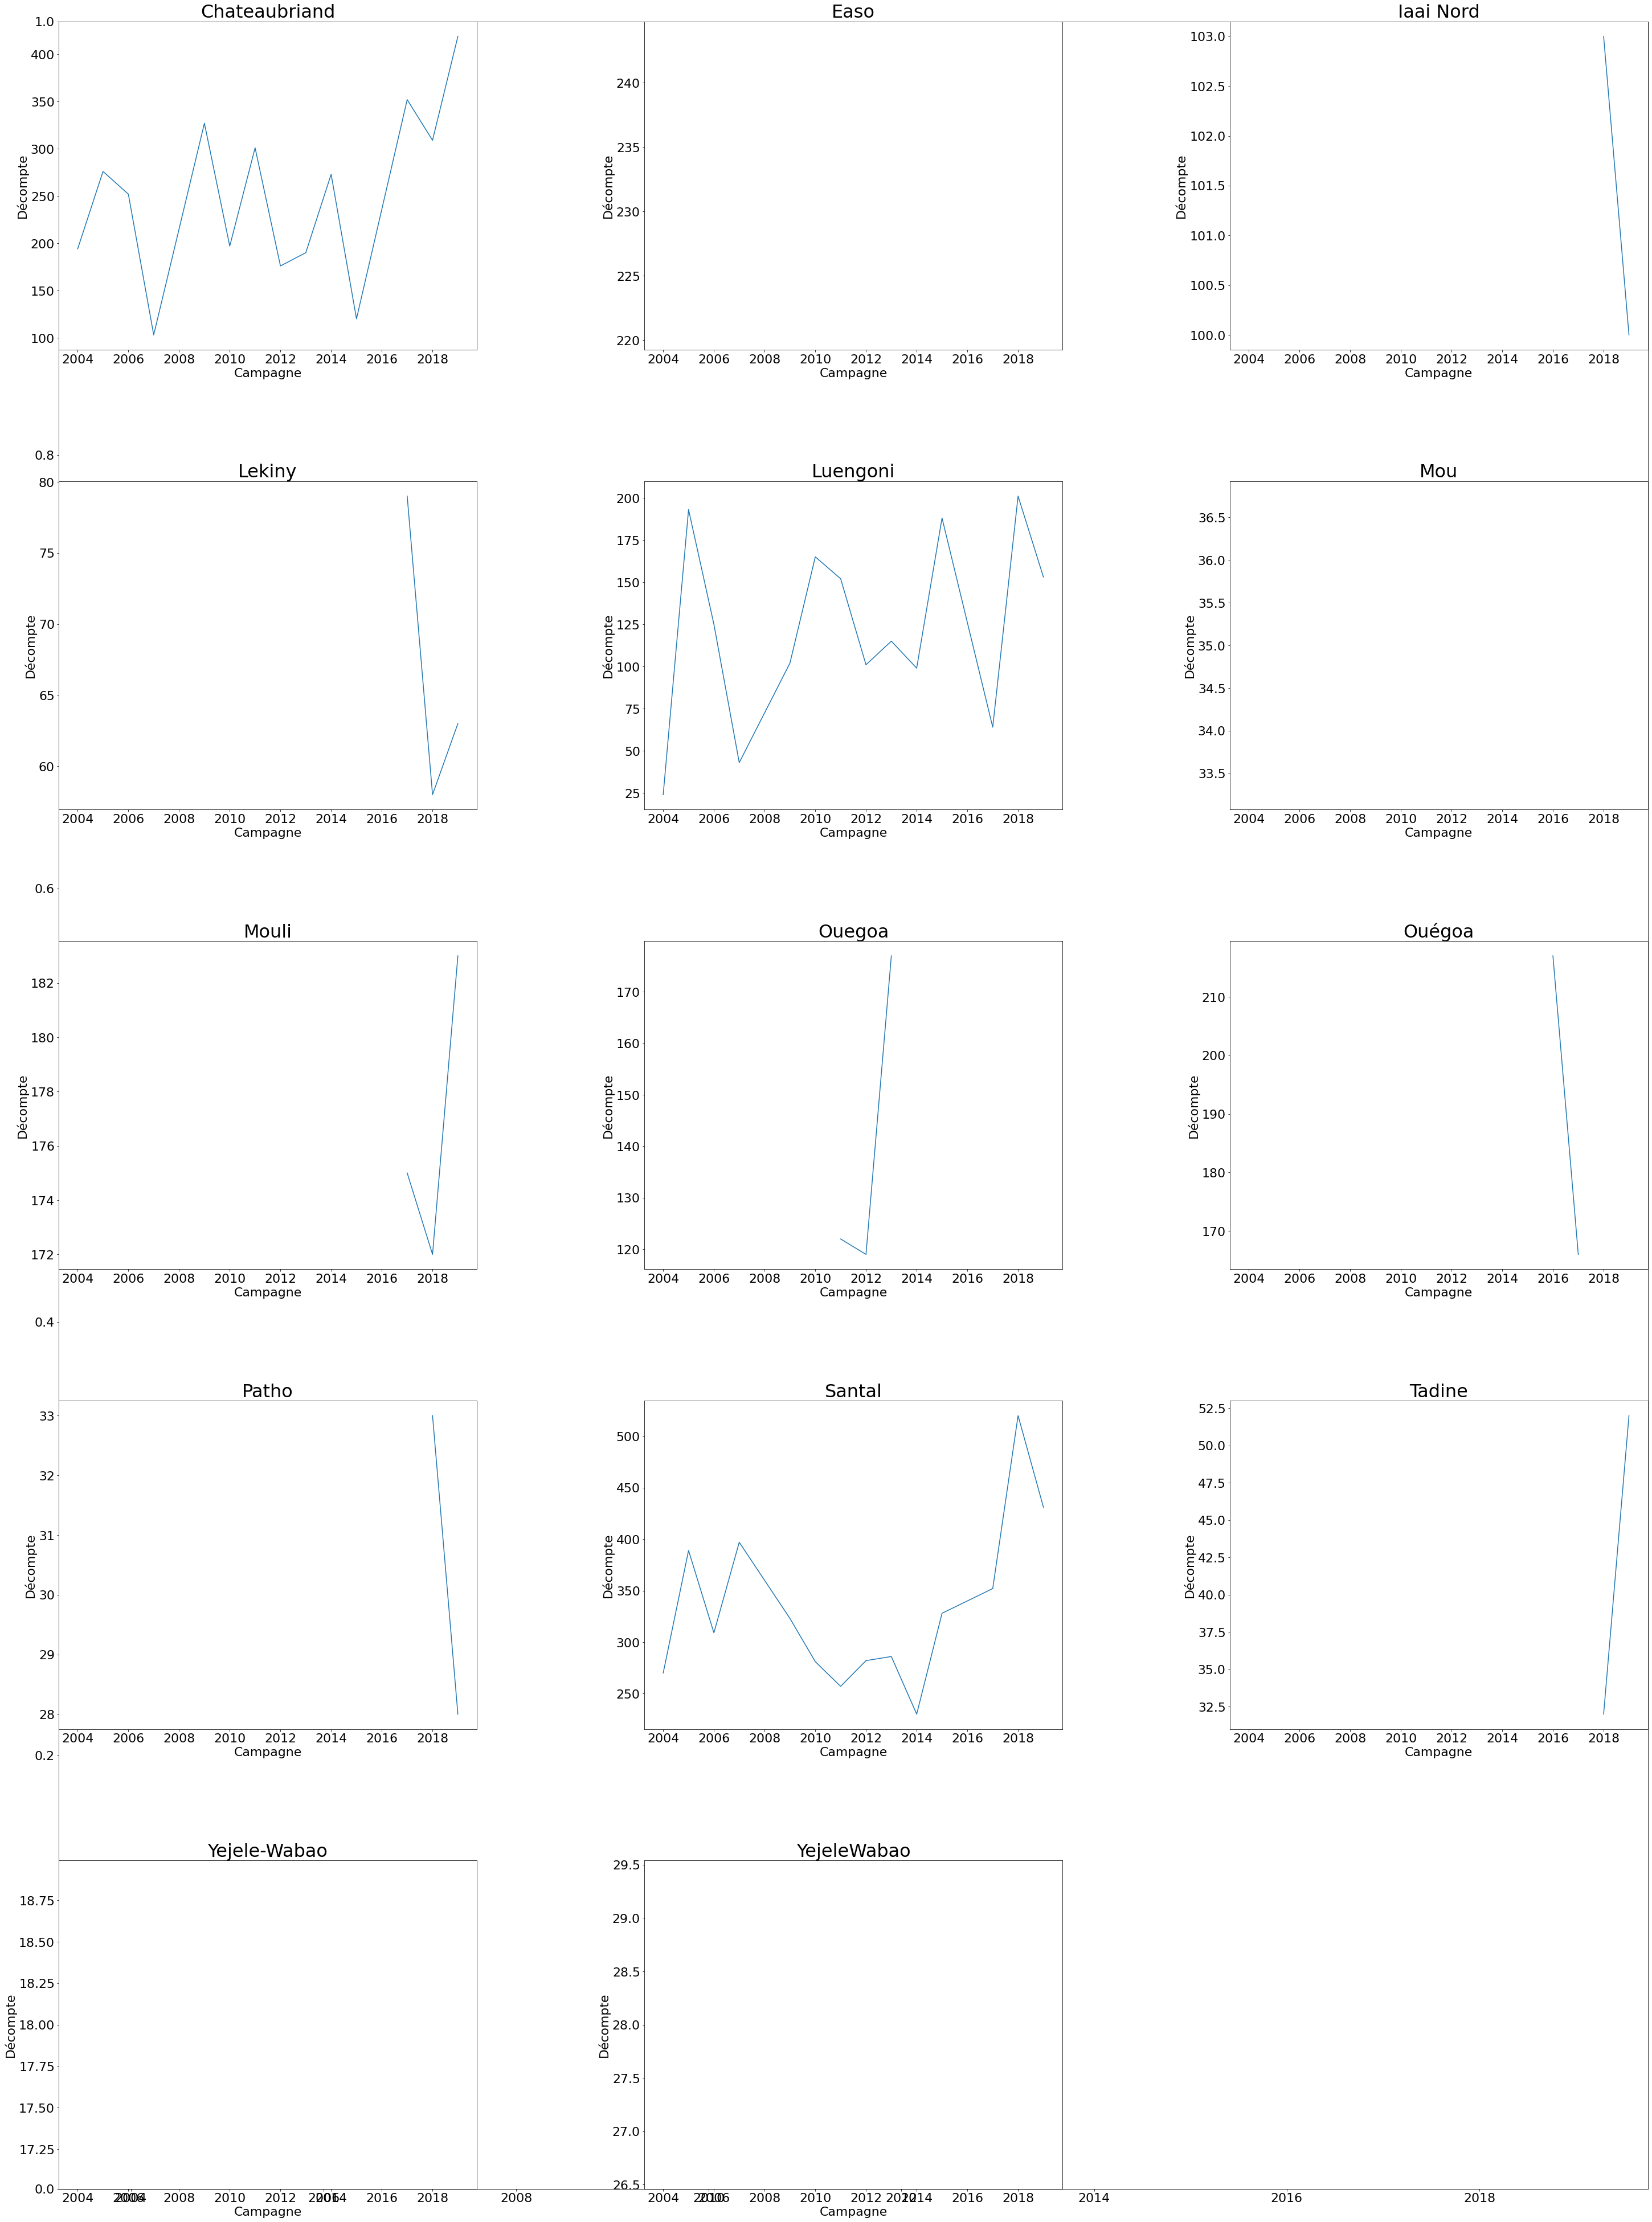

In [10]:
def draw_site_evolution(df):
    figure = plt.figure(figsize=(50, 70))
    figure.subplots_adjust(hspace=0.4, wspace=0.4)
    share_handle = plt.gca()
    for i, cat in enumerate(df['Site'].cat.categories.unique()):
        filtered_df = df[df['Site'] == cat].groupby('Campagne').sum()
        axes = figure.add_subplot(int(len(df['Site'].cat.categories.unique())/3)+1 ,3, i+1, sharex=share_handle)
        ax = sns.lineplot(x='Campagne', y='Décompte',
                          data=filtered_df,
                          ci=None, ax=axes)
        ax.set_title(cat, fontsize=32)

draw_site_evolution( df[['Site', 'Décompte', 'Campagne']])